In [1]:
import pandas as pd
import yfinance as yf

# Define the ETF ticker symbol
etf_symbol = 'SPY'
# Define the time frame for data (e.g., last 5 years)
data = yf.download(etf_symbol, start='2018-01-01', end='2023-10-01', progress=False)
# Reset index to access 'Date' as a column
data.reset_index(inplace=True)
# Display the first few rows
print(data.head())

Price                       Date   Adj Close       Close        High  \
Ticker                                   SPY         SPY         SPY   
0      2018-01-02 00:00:00+00:00  240.801514  268.769989  268.809998   
1      2018-01-03 00:00:00+00:00  242.324615  270.470001  270.640015   
2      2018-01-04 00:00:00+00:00  243.345963  271.609985  272.160004   
3      2018-01-05 00:00:00+00:00  244.967636  273.420013  273.559998   
4      2018-01-08 00:00:00+00:00  245.415665  273.920013  274.100006   

Price          Low        Open    Volume  
Ticker         SPY         SPY       SPY  
0       267.399994  267.839996  86655700  
1       268.959991  268.959991  90070400  
2       270.540009  271.200012  80636400  
3       271.950012  272.510010  83524000  
4       272.980011  273.309998  57319200  


In [2]:
import numpy as np

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Extract weekday name
data['Weekday'] = data['Date'].dt.day_name()

# Drop the first row with NaN return
data.dropna(inplace=True)

# Group by weekday and calculate average return
weekday_returns = data.groupby('Weekday')['Daily Return'].mean()

# To ensure the weekdays are in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_returns = weekday_returns.reindex(weekday_order)

print("Average Daily Returns by Weekday:")
print(weekday_returns)

Average Daily Returns by Weekday:
Weekday
Monday       0.000304
Tuesday      0.000686
Wednesday    0.000585
Thursday     0.000194
Friday       0.000581
Name: Daily Return, dtype: float64


In [3]:
# Extract day of the month
data['Day'] = data['Date'].dt.day

# Group by day and calculate average return
day_returns = data.groupby('Day')['Daily Return'].mean()
# Sort by average return in descending order
day_returns_sorted = day_returns.sort_values(ascending=False)
print("\nAverage Daily Returns by Day of the Month:")
print(day_returns_sorted)


Average Daily Returns by Day of the Month:
Day
4     0.004928
15    0.003160
25    0.002260
6     0.002070
28    0.002001
2     0.001990
26    0.001920
29    0.001736
10    0.001684
13    0.001674
24    0.001648
17    0.001574
1     0.001067
8     0.000857
7     0.000640
12    0.000517
5     0.000414
30    0.000225
14    0.000048
21   -0.000091
31   -0.000513
23   -0.000554
27   -0.000618
3    -0.000744
9    -0.000946
16   -0.001493
22   -0.001530
19   -0.001678
20   -0.001996
18   -0.002466
11   -0.002800
Name: Daily Return, dtype: float64


/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_2036/1655185074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_returns.index, y=weekday_returns.values, palette='Blues_d')


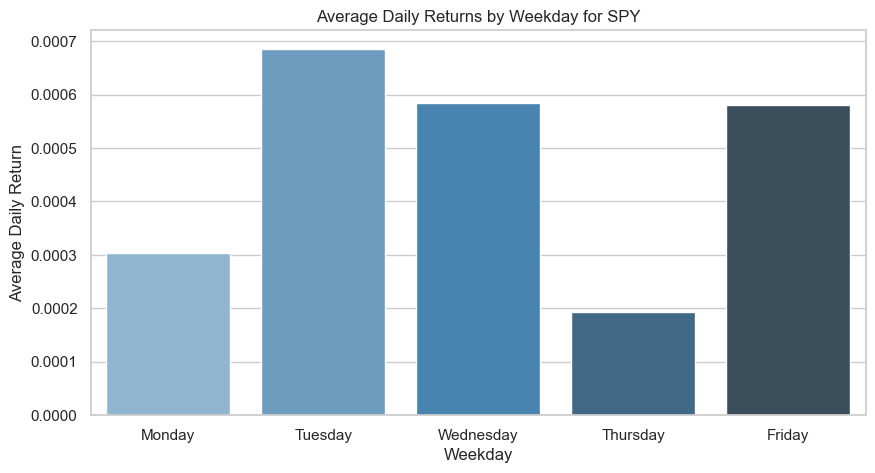

/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_2036/1655185074.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_returns_sorted.index[:10], y=day_returns_sorted.values[:10], palette='Greens_d')


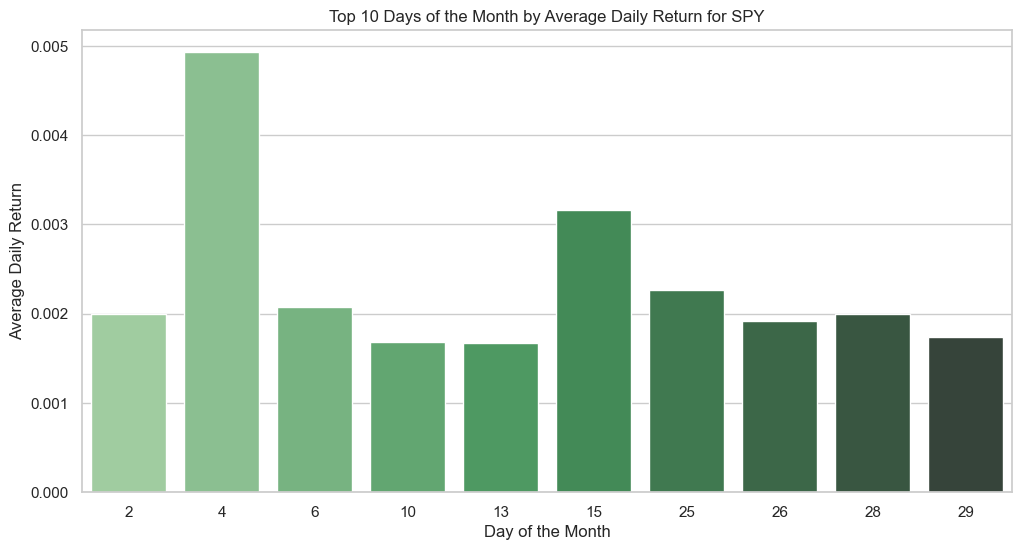

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot average returns by weekday
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_returns.index, y=weekday_returns.values, palette='Blues_d')
plt.title('Average Daily Returns by Weekday for SPY')
plt.xlabel('Weekday')
plt.ylabel('Average Daily Return')
plt.show()

# Plot top 10 days of the month
plt.figure(figsize=(12, 6))
sns.barplot(x=day_returns_sorted.index[:10], y=day_returns_sorted.values[:10], palette='Greens_d')
plt.title('Top 10 Days of the Month by Average Daily Return for SPY')
plt.xlabel('Day of the Month')
plt.ylabel('Average Daily Return')
plt.show()